# Un problema de visión artificial mediante redes neuronales

### Planteamiento

En este cuaderno vamos a resolver un problema de visión artificial. Construiremos una red neuronal capaz de recibir una fotografía de una prenda de ropa e indicarnos a cual de las siguientes diez categorías pertenece:

1. Camisetas
2. Pantalones
3. Jerseys
4. Vestidos
5. Abrigos
6. Sandalias
7. Camisas
8. Zapatillas de deporte
9. Bolsos
10. Botines

Para construir esta red neuronal emplearemos Keras: el marco de trabajo con redes neuronales diseñado por Google.

### Breve exploración de los datos

Comenzamos cargando el conjunto de datos. El conjunto de datos Fashion MNIST es uno de los más usados como iniciación a la Visión Artificial y se encuentra integrado dentro de Keras:


In [1]:
from keras.datasets import fashion_mnist

(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_test, etiquetas_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Empleamos el atributo `shape` para ver el tamaño de nuestros datos:

In [2]:
imagenes_entrenamiento.shape

(60000, 28, 28)

In [3]:
etiquetas_entrenamiento.shape

(60000,)

In [ ]:
imagenes_test.shape

(10000, 28, 28)

In [ ]:
etiquetas_test.shape

(10000,)

Podemos probar a visualizar alguna de estas imágenes. Si observamos el dato veremos que es una matriz de números:

In [4]:
prenda = imagenes_entrenamiento[5]

Podemos visualizar este conjunto de datos como una imagen usando el módulo matplotlib:

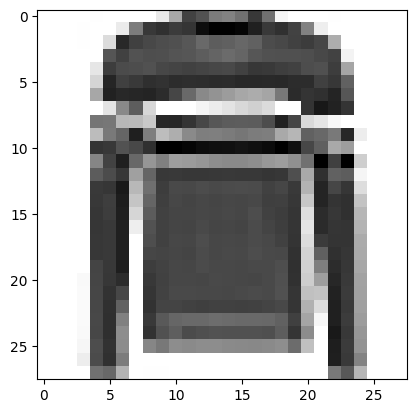

In [5]:
import matplotlib.pyplot as plt
plt.imshow(prenda, cmap=plt.cm.binary)
plt.show()

Para estandarizar los datos (buena práctica a la hora de trabajar con redes neuronales) vamos a hacer que todos los valores con los que trabajemos se encuentren entre 0 y 1:

In [6]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000, 28 * 28))
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32') / 255
imagenes_test = imagenes_test.reshape((10000, 28 * 28))
imagenes_test = imagenes_test.astype('float32') / 255

Además convertiremos las etiquetas en variables categóricas para que el modelo entienda que tiene que predecir categorías y no aplique razonamientos numéricos, por ejemplo, que como 8 es zapatillas de deporte y 10 botines, los bolsos (9) son un punto intermedio entre ambos:

In [7]:
from keras.utils import to_categorical
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

### Resolución del problema

Una vez que tenemos cargados los datos con los que vamos a trabajar procedemos a construir la artquitectura de la red neuronal. Planteamos una red neuronal con dos capas:

1. Una capa con 512 neuronas que procesarán toda la información.
2. Una capa final con diez neuronas, una por cada categoría que deseamos predecir.

La idea es que cada neurona de la última capa prediga la probabilidad de cada categoría, es decir, la primera neurona indicará la probabilidad de que se trate de una camiseta, la segunda de un pantalón y así sucesivamente.

Para construir la arquitectura de la red simplemente generaremos un modelo y le asociaremos dos capas:

In [8]:
from keras import models
from keras import layers

red_neuronal = models.Sequential() # indicamos que vamos a construir un modelo secuencial
red_neuronal.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # añadimos la primera capa con 512 neuronas, una función de activación y la forma de los datos de entrada
red_neuronal.add(layers.Dense(10, activation="softmax"))

__Nota.__ Las funciones de activación de cada capa indican qué transformaciones matemáticas sufrirán los datos al terminar de atravesar dicha capa. Al fin y al cabo podemos pensar en cada capa como una transformación y un filtro de datos.

Con estas dos líneas hemos construido la arquitectura de nuestra primera red neuronal. Una vez hecho esto debemos compilar el modelo, es decir, darle las indicaciones necesarias para que pueda ser entrenado.

Al compilar el modelo el indicaremos qué tipo de optimizador utilizar, qué función de pérdida y qué métricas deseamos monitorizar.

Cuando abordamos un problema de aprendizaje profundo siempre estaremos en el fondo abordando un problema de optimización. En este caso buscamos el modelo que menos se equivoque al realizar las predicciones sobre las prendas, por eso debemos definir un optimizador y una función de pérdida que buscamos reducir. La métrica será una medida que nos interese monitorizar, en este caso por ejemplo monitorizaremos la tasa de acierto:

In [9]:
red_neuronal.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Nuestra arquitectura ya está diseñada y nuestra red compilada por lo que ya estamos listos para entrenar nuestra primera red neuronal. Para ello simplemente alimentaremos el modelo con imágenes y sus etiquetas. Además le indicaremos cuántas iteraciones (epochs) queremos que haga, es decir, cuántas veces queremos que repase los datos y un tamaño de lote (batch size) que hace referencia a cuántas imágenes van a procesarse de cada vez:

In [10]:
red_neuronal.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 6s 11ms/step - loss: 0.5634 - accuracy: 0.8003
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.3878 - accuracy: 0.8590
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.3399 - accuracy: 0.8753
Epoch 4/25
469/469 [==============================] - 5s 11ms/step - loss: 0.3118 - accuracy: 0.8844
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2938 - accuracy: 0.8909
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2784 - accuracy: 0.8972
Epoch 7/25
469/469 [==============================] - 5s 11ms/step - loss: 0.2650 - accuracy: 0.9010
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2543 - accuracy: 0.9057
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.2447 - accuracy: 0.9092
Epoch 10/25
469/469 [==============================] - 5s 11ms/step - loss: 0.2356 - accuracy: 0.

¡Ya tenemos nuestro modelo construido y entrenado! Vamos a evaluar cómo de bien nos ha ido:

In [11]:
perdida_test, acierto_test = red_neuronal.evaluate(imagenes_test, etiquetas_test)
print('Nuestro modelo acierta en el conjunto de evaluación en un porcentaje de:', acierto_test * 100, "%.")

313/313 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8889
Nuestro modelo acierta en el conjunto de evaluación en un porcentaje de: 88.88999819755554 %.


Con estas pocas líneas de código hemos sido capaces de construir y entrenar un modelo capaz de procesar imágenes y predecir su clasificación, en concreto, a partir de fotos de ropa en baja resolución es capaz de clasificarlas en diez categorías con una tasa de acierto del 90%.

¡Esta tasa aún es mejorable, te animo a tomando este cuaderno como base probar a construir tus propias redes, con más capas o distintos parámetros para ver si logras obtener un resultado mejor!

¡Muchas gracias!